In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [424]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [425]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [426]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [427]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [428]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [429]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [430]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [431]:
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+12*iqr
lower = q1-12*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [432]:
def words(text):
    return(len(str(text).lower().split())/len(str(text)))

def letter(text):
    return(len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).lower().split() if w in stopwords]
    return(len(s)/len(str(text)))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text)))

def n_title(text):
    s = [w for w in str(text).lower().split() if w.islower()]
    return(len(s)/len(str(text)))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Genre_char'] = train.Genre.apply(lambda x: letter(x))
test['Genre_char'] = test.Genre.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Genre_word'] = train.Genre.apply(lambda x: words(x))
test['Genre_word'] = test.Genre.apply(lambda x: words(x))

train['Book_word'] = train.BookCategory.apply(lambda x: words(x))
test['Book_word'] = test.BookCategory.apply(lambda x: words(x))

#train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
#train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

#test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
#test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]

#train['Title_0'] = train.Title_0.apply(lambda x: words(x))
#test['Title_0'] = test.Title_0.apply(lambda x: words(x))

#train['Title_1'] = train.Title_1.apply(lambda x: words(x))
#test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [433]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [434]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

In [435]:
train.Date.fillna(2014, inplace=True)
test.Date.fillna(2014, inplace=True)

In [436]:
train['Edition_t'] = train.Edition.str.extract(r'([a-zA-Z|\s]*),.*')
test['Edition_t'] = test.Edition.str.extract(r'([a-zA-Z|\s]*),.*')

In [437]:
train.Edition_t.replace({'':'other'}, inplace=True)
test.Edition_t.replace({'':'other'}, inplace=True)

In [438]:
t = set(train.Edition_t.value_counts().index).difference(set(test.Edition_t.value_counts().index))
train.Edition_t = train.Edition_t.apply(lambda x: np.NaN if x in list(t) else x)

In [439]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [440]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [441]:
train['Rating_t'] = train.Reviews.str.extract(r"(^\d*)")
test['Rating_t'] = test.Reviews.str.extract(r"(^\d*)")

In [442]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

#train['Rat_Rev'] = train['Rat_Rev'].apply(lambda x: x/5)
#test['Rat_Rev'] = test['Rat_Rev'].apply(lambda x: x/5)

In [443]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [444]:
train.head(1)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Genre_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Genre_word,Book_word,Date,Edition_t,Review_t,Rating_t,Rat_Rev,Genre_t
0,The Prisoner's Gold (The Hunters 3),other,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.0,0.171429,0.165613,35,791,26,0.028571,0.069532,0.0,0.0,0.142857,0.165613,0.153846,0.166667,2016,Paperback,4.0,4,16.0,Action & Adventure (Books)


In [445]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,1))
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,1))
e = tfidf.fit_transform(pd.concat([train.Genre, test.Genre], axis = 0))

In [446]:
countvec = CountVectorizer(ngram_range=(1,1), stop_words='english')
f = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

countvec = CountVectorizer(ngram_range=(1,1))
g = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0))

countvec = CountVectorizer(ngram_range=(1,1))
h = tfidf.fit_transform(pd.concat([train.Genre, test.Genre], axis = 0))

In [447]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=30)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(30)])
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(30,60)])
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(60,90)])
f = pd.DataFrame(pca.fit_transform(f), columns = [a for a in range(90,120)])
g = pd.DataFrame(pca.fit_transform(g), columns = [a for a in range(120,150)])
h = pd.DataFrame(pca.fit_transform(h), columns = [a for a in range(150,180)])

In [448]:
np.sum(pca.explained_variance_ratio_)

0.6935518091030087

In [449]:
train.shape, test.shape

((6203, 28), (1560, 27))

In [450]:
tr = x.iloc[:6203,:]
te = x.iloc[6203:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6203,:]
te_z = z.iloc[6203:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6203,:]
te_e = e.iloc[6203:,:]
te_e.reset_index(drop = True, inplace=True)

tr_f = f.iloc[:6203,:]
te_f = f.iloc[6203:,:]
te_f.reset_index(drop = True, inplace=True)

tr_g = g.iloc[:6203,:]
te_g = g.iloc[6203:,:]
te_g.reset_index(drop = True, inplace=True)

tr_h = h.iloc[:6203,:]
te_h = h.iloc[6203:,:]
te_h.reset_index(drop = True, inplace=True)

In [451]:
train = pd.concat([train, tr, tr_z, tr_e, tr_f, tr_g, tr_h], axis = 1)
test = pd.concat([test, te, te_z, te_e, te_f, te_g, te_h], axis = 1)

In [452]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6203, 208), (1560, 207))

In [453]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [454]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Columns: 202 entries, Author to 179
dtypes: float64(192), int64(3), object(7)
memory usage: 9.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 201 entries, Author to 179
dtypes: float64(191), int64(3), object(7)
memory usage: 2.4+ MB


(None, None)

In [455]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_t = train.Edition_t.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')


test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_t = test.Edition_t.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

train.Date = train.Date.apply(lambda x: 2019-int(x))
test.Date = test.Date.apply(lambda x: 2019-int(x))

In [456]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Columns: 202 entries, Author to 179
dtypes: category(4), float64(194), int64(4)
memory usage: 9.4 MB


In [457]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [458]:
train.shape, test.shape

((6203, 201), (1560, 201))

3.2945364368328134 14.818247337198812


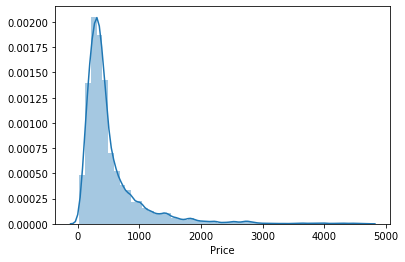

In [459]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

0.28138777016636807 0.6013369879194741


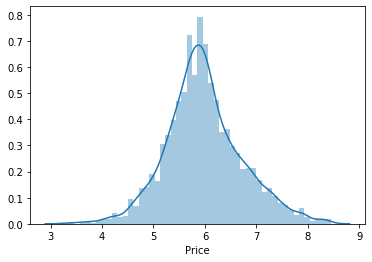

In [460]:
sns.distplot(np.log1p(train_label))
print(np.log1p(train_label).skew(), np.log1p(train_label).kurt())

In [461]:
train_label = train_label.apply(lambda x: np.log1p(x))

df = pd.DataFrame(pd.concat([train[c], test[c]], axis = 0), columns =train.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].ftype == 'category:dense' :
        df[c] = le.fit_transform(pd.concat([train[c], test[c]], axis = 0))
    else :
        df[c] = pd.concat([train[c], test[c]], axis = 0)

In [462]:
pd.set_option('max_column',200)
train.head()

,Author,BookCategory,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Genre_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Genre_word,Book_word,Date,Edition_t,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,other,Action & Adventure,0.171429,0.165613,35,791,26,0.028571,0.069532,0.0,0.0,0.142857,0.165613,0.153846,0.166667,3,Paperback,4.0,4.0,16.0,Action & Adventure (Books),0.096918,-0.060069,0.014277,-0.003066,0.019106,-0.013484,-0.003622,-0.058421,-0.002520,0.037307,-0.011799,-0.004005,0.012606,-0.008602,-0.009970,0.006490,0.015249,-0.033048,0.012274,0.004716,-0.007863,-0.004155,0.001528,-0.044707,0.015782,0.001420,-0.013229,-0.036722,0.031423,0.009701,0.184465,-0.044307,-0.090617,0.038705,0.019507,0.069680,0.045866,-0.029689,0.026910,0.039224,-0.013108,-0.017727,-0.010987,0.012165,0.001612,-0.001996,0.016097,0.004519,-0.001233,0.000982,-0.004242,-0.014105,-0.007603,-0.001903,0.007770,-0.010957,0.005457,-0.005232,-0.005215,0.007518,0.992331,-0.118515,-0.011464,-0.009873,-0.022955,0.001150,-0.018996,-0.004616,-0.002021,-0.003182,-0.000110,-0.003922,-0.001220,-0.004752,-0.000001,-0.000895,-0.002077,0.001081,-0.000581,...,-0.000396,-0.001467,-0.001212,-0.000086,-0.002448,-0.001363,0.000147,-0.002737,0.000070,-0.000178,0.227497,0.037319,-0.024557,-0.064580,0.022912,0.073534,-0.040504,0.050137,0.041985,-0.003556,-0.030258,-0.005548,0.010300,-0.000883,-0.012021,0.011480,0.012646,-0.036337,0.038672,0.006232,-0.046823,0.002526,-0.004214,0.007995,-0.008145,-0.002104,0.016785,-0.007290,-0.035725,-0.032944,0.184465,-0.044289,-0.090633,0.038694,0.019349,0.069837,0.045902,-0.029679,0.026499,0.038883,-0.012905,-0.019326,-0.004973,0.013026,0.001096,-0.003000,0.015361,0.000460,-0.005411,-0.001910,-0.008839,-0.020260,0.003686,0.005161,0.002062,0.003278,-0.013955,0.012562,0.009164,0.014399,0.992331,-0.118515,-0.011464,-0.009873,-0.022955,0.001150,-0.018996,-0.004616,-0.002023,-0.003180,-0.000113,-0.003923,-0.001226,-0.004773,0.000004,-0.000892,-0.002084,0.001071,-0.000592,-0.001575,-0.000397,-0.001482,-0.001190,-0.000123,-0.002365,-0.001360,0.000043,-0.002573,0.000256,-0.000377
1,Arun Khopkar,"Biographies, Diaries & True Accounts",0.205882,0.159686,34,1146,26,0.058824,0.055846,0.0,0.0,0.205882,0.158813,0.153846,0.138889,7,Paperback,3.9,3.0,11.7,Cinema & Broadcast (Books),0.109584,0.008873,-0.004227,0.041523,-0.010194,0.014323,0.011094,-0.009245,-0.040070,-0.045135,0.031372,0.026747,0.038219,-0.006407,-0.019975,-0.019533,0.011887,0.001656,0.029671,-0.049003,-0.032631,-0.005464,-0.004489,0.036989,0.050920,0.000321,-0.025570,-0.007477,-0.008590,0.012099,0.030967,0.047948,0.031466,0.034169,0.136080,-0.006968,-0.061641,-0.041186,-0.073394,-0.005300,0.011429,-0.007666,0.003752,-0.007839,-0.011321,-0.012610,-0.008970,-0.025763,0.019264,-0.005874,-0.011914,0.000358,0.007235,-0.010238,-0.007028,-0.008558,0.006401,-0.009601,0.005220,-0.007304,0.059632,0.075776,0.011070,0.011358,0.036254,-0.001995,0.111247,0.041111,0.019474,0.039528,0.001578,0.060333,0.037430,0.233514,-0.000025,0.084676,0.510107,-0.469963,-0.617508,...,-0.006104,-0.093159,-0.062589,-0.003510,-0.038981,-0.025964,0.002731,-0.021558,-0.004225,-0.009851,0.199184,-0.019315,-0.057326,0.027031,0.021119,-0.043758,-0.013107,-0.017276,-0.028187,0.051294,0.014238,0.043510,-0.003454,0.047576,0.014346,-0.017978,-0.029141,0.035311,0.014619,-0.008390,-

In [465]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train,test], axis = 0)
df.Author = le.fit_transform(df.Author)
#df.Genre_t = le.fit_transform(df.Genre_t)
#df.BookCategory = le.fit_transform(df.BookCategory)
#df.Edition_t = le.fit_transform(df.Edition_t)
train.shape, test.shape

((6203, 201), (1560, 201))

In [466]:
train = df.iloc[:6203,:]
test = df.iloc[6203:,:]
test.reset_index(drop=True, inplace=True)

In [467]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6203, 423) (1560, 423)


In [468]:
train.head()

,Author,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Genre_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Genre_word,Book_word,Date,Review_t,Rating_t,Rat_Rev,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,...,Genre_t_History of Ancient Greece,Genre_t_History of Religion (Books),Genre_t_Hockey,Genre_t_Holocaust,Genre_t_Home & House Maintenance (Books),Genre_t_Horror (Books),Genre_t_Humour (Books),Genre_t_Hunting (Books),Genre_t_IELTS,Genre_t_IGCSE,Genre_t_IT Certification Exams,Genre_t_Illustrated Travel Books (Books),Genre_t_Indian Writing (Books),Genre_t_Industrial Engineering,Genre_t_Industries & Business Sectors (Books),Genre_t_Interface Design Programming,Genre_t_International Entrance Exams,Genre_t_International Relations,Genre_t_Internet & Web (Books),Genre_t_Introductory & Beginning Programming,Genre_t_Journalism Books,Genre_t_Labor & Industrial Relations,Genre_t_Language & Linguistics,Genre_t_Language Learning & Teaching (Books),"Genre_t_Language, Linguistics & Writing (Books)",Genre_t_Library & Information Science,Genre_t_Linguistics (Books),Genre_t_Literary Travel,Genre_t_Literature,Genre_t_Literature & Fiction (Books),Genre_t_Literature Encyclopedias,Genre_t_Macroeconomics Textbooks,Genre_t_Management,Genre_t_Mangas,Genre_t_Martial Arts (Books),Genre_t_Mathematics (Books),Genre_t_Meditation,Genre_t_Mental & Spiritual Healing,Genre_t_Middle Eastern History,"Genre_t_Mind, Body & Spirit (Books)",Genre_t_Motorcycle Racing,Genre_t_Music Books,"Genre_t_Myths, Legends & Sagas (Books)",Genre_t_Networks & System Administration (Books),Genre_t_Neuroscience,Genre_t_Operating Systems Textbooks,Genre_t_Outdoor Survival Skills (Books),Genre_t_Personal Development & Self-Help (Books),Genre_t_Photography Textbooks,Genre_t_Physics (Books),Genre_t_Plays (Books),Genre_t_Political Ideologies (Books),Genre_t_Political Structure & Processes (Books),Genre_t_Political Theory (Books),Genre_t_Politics (Books),Genre_t_Programming & Software Development (Books),Genre_t_Programming Algorithms,Genre_t_Programming Languages (Books),Genre_t_Psychology (Books),Genre_t_Public Policy,Genre_t_Public Speaking Reference,Genre_t_Reading Skills,Genre_t_Religion (Books),Genre_t_Religious & Spiritual Fiction (Books),Genre_t_Rhetoric & Speech (Books),Genre_t_Romance (Books),Genre_t_Sales,Genre_t_Science & Mathematics,Genre_t_Short Stories (Books),Genre_t_Soccer (Books),Genre_t_Social Sciences,Genre_t_Social Welfare & Social Services (Books),Genre_t_Society & Culture (Books),Genre_t_Sociology (Books),Genre_t_Software & Business Applications (Books),Genre_t_Software Architecture,Genre_t_Software Design & Engineering,Genre_t_Software Testing,Genre_t_Speech,Genre_t_Spirituality,Genre_t_Sporting Events & Organisations (Books),Genre_t_Sports (Books),Genre_t_Sports Medicine,Genre_t_Sports Training & Coaching (Books),"Genre_t_Swimming, Snorkelling & Diving (Books)",Genre_t_TOEFL,Genre_t_Teaching & Education,Genre_t_Theater,Genre_t_Theatre & Spectacles (Books),Genre_t_Theory,Genre_t_Travel & Holiday Guides (Books),Genre_t_Travel (Books),Genre_t_True Accounts (Books),Genre_t_United States History,Genre_t_Vocabulary Books,"Genre_t_Walking, Hiking & Trekking (Books)","Genre_t_Words, Language & Grammar Reference",Genre_t_Workbooks,Genre_t_Writing Guides (Books),Genre_t_other
0,529,0.171429,0.165613,35,791,26,0.028571,0.069532,0.0,0.0,0.142857,0.165613,0.153846,0.166667,3,4.0,4.0,16.0,0.096918,-0.060069,0.014277,-0.003066,0.019106,-0.013484,-0.003622,-0.058421,-0.002520,0.037307,-0.011799,-0.004005,0.012606,-0.008602,-0.009970,0.006490,0.015249,-0.033048,0.012274,0.004716,-0.007863,-0.004155,0.001528,-0.044707,0.015782,0.001420,-0.013229,-0.036722,0.031423,0.009701,0.184465,-0.044307,-0.090617,0.038705,0.019507,0.0696

In [469]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [470]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [471]:
train.shape, test.shape

((6203, 423), (1560, 423))

# ML

In [472]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [474]:
score = cross_val_score(xgb.XGBRegressor(), train, train_label, scoring='neg_mean_squared_error', cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [475]:
score

array([-0.29932767, -0.27217006, -0.32193453])

In [477]:
score = cross_val_score(lgb.LGBMRegressor(), train, train_label, scoring='neg_mean_squared_error', cv=3)

In [478]:
score

array([-0.27344616, -0.25163054, -0.30108914])

In [481]:
param_xgb = {}
param_xgb['learning_rate'] = 0.1
param_xgb['seed'] = 513
param_xgb['eval_metric'] = 'rmse'
param_xgb['objective'] = 'reg:linear'

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.05
param_lgb['seed'] = 37
param_lgb['metric'] = 'rmse'

def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=71)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=5000,
                             early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(xtest, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=5000, early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(testset, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [482]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

[01:42:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:4.99843	test-rmse:4.963
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.50801	test-rmse:4.47534
[2]	train-rmse:4.06719	test-rmse:4.03641
[3]	train-rmse:3.67092	test-rmse:3.64364
[4]	train-rmse:3.31491	test-rmse:3.28909
[5]	train-rmse:2.99487	test-rmse:2.97215
[6]	train-rmse:2.70769	test-rmse:2.68854
[7]	train-rmse:2.44995	test-rmse:2.43341
[8]	train-rmse:2.21862	test-rmse:2.20594
[9]	train-rmse:2.01093	test-rmse:2.00325
[10]	train-rmse:1.82474	test-rmse:1.82167
[11]	train-rmse:1.65797	test-rmse:1.65833
[12]	train-rmse:1.50869	test-rmse:1.51537
[13]	train-rmse:1.37524	test-rmse:1.38749
[14]	train-rmse:1.25618	test-rmse:1.27536
[15]	train-rmse:1.14966	test-rmse:1.17611
[16]	train-rmse:1.0549	test-rmse:1.08821
[17]	train-rmse:0.970534	test-rmse:1.01

[181]	train-rmse:0.159973	test-rmse:0.532712
[182]	train-rmse:0.159483	test-rmse:0.532614
[183]	train-rmse:0.15871	test-rmse:0.532648
[184]	train-rmse:0.157952	test-rmse:0.532619
[185]	train-rmse:0.156652	test-rmse:0.532851
[186]	train-rmse:0.156222	test-rmse:0.532818
[187]	train-rmse:0.155546	test-rmse:0.532851
[188]	train-rmse:0.155077	test-rmse:0.53286
[189]	train-rmse:0.154817	test-rmse:0.532915
[190]	train-rmse:0.153562	test-rmse:0.532807
[191]	train-rmse:0.15234	test-rmse:0.532725
[192]	train-rmse:0.151864	test-rmse:0.532697
[193]	train-rmse:0.150717	test-rmse:0.532713
[194]	train-rmse:0.150279	test-rmse:0.532705
[195]	train-rmse:0.150089	test-rmse:0.53266
[196]	train-rmse:0.148966	test-rmse:0.532643
[197]	train-rmse:0.148409	test-rmse:0.532711
[198]	train-rmse:0.147831	test-rmse:0.532723
[199]	train-rmse:0.147388	test-rmse:0.532741
[200]	train-rmse:0.145813	test-rmse:0.532551
[201]	train-rmse:0.144672	test-rmse:0.532463
[202]	train-rmse:0.143471	test-rmse:0.53217
[203]	train-rms

[364]	train-rmse:0.066136	test-rmse:0.530786
[365]	train-rmse:0.065662	test-rmse:0.530767
[366]	train-rmse:0.065242	test-rmse:0.530745
[367]	train-rmse:0.065154	test-rmse:0.530685
[368]	train-rmse:0.064914	test-rmse:0.530652
[369]	train-rmse:0.064735	test-rmse:0.530664
[370]	train-rmse:0.064521	test-rmse:0.53069
[371]	train-rmse:0.064339	test-rmse:0.530701
[372]	train-rmse:0.063709	test-rmse:0.530691
[373]	train-rmse:0.063529	test-rmse:0.530695
[374]	train-rmse:0.062832	test-rmse:0.530671
[375]	train-rmse:0.062653	test-rmse:0.530623
[376]	train-rmse:0.062494	test-rmse:0.530621
[377]	train-rmse:0.062418	test-rmse:0.530605
[378]	train-rmse:0.0623	test-rmse:0.530609
[379]	train-rmse:0.061752	test-rmse:0.530555
[380]	train-rmse:0.061204	test-rmse:0.530579
[381]	train-rmse:0.060992	test-rmse:0.53059
[382]	train-rmse:0.060652	test-rmse:0.530534
[383]	train-rmse:0.060299	test-rmse:0.530596
[384]	train-rmse:0.060167	test-rmse:0.530574
[385]	train-rmse:0.059883	test-rmse:0.530551
[386]	train-rm

[548]	train-rmse:0.032945	test-rmse:0.530051
[549]	train-rmse:0.032851	test-rmse:0.530059
[550]	train-rmse:0.032684	test-rmse:0.530049
[551]	train-rmse:0.032584	test-rmse:0.530058
[552]	train-rmse:0.032457	test-rmse:0.530077
[553]	train-rmse:0.032448	test-rmse:0.530077
[554]	train-rmse:0.032403	test-rmse:0.530084
[555]	train-rmse:0.03224	test-rmse:0.530085
[556]	train-rmse:0.032131	test-rmse:0.530078
[557]	train-rmse:0.032005	test-rmse:0.530071
[558]	train-rmse:0.031899	test-rmse:0.530066
[559]	train-rmse:0.031803	test-rmse:0.530078
[560]	train-rmse:0.031706	test-rmse:0.530086
[561]	train-rmse:0.031602	test-rmse:0.530092
[562]	train-rmse:0.031469	test-rmse:0.530076
[563]	train-rmse:0.031371	test-rmse:0.530066
[564]	train-rmse:0.031182	test-rmse:0.530054
[565]	train-rmse:0.031095	test-rmse:0.530058
[566]	train-rmse:0.031026	test-rmse:0.530062
[567]	train-rmse:0.030981	test-rmse:0.530057
[568]	train-rmse:0.030877	test-rmse:0.530065
[569]	train-rmse:0.030824	test-rmse:0.530072
[570]	train

[8]	train-rmse:2.21173	test-rmse:2.23489
[9]	train-rmse:2.00484	test-rmse:2.02895
[10]	train-rmse:1.81954	test-rmse:1.84491
[11]	train-rmse:1.65358	test-rmse:1.68091
[12]	train-rmse:1.50514	test-rmse:1.53558
[13]	train-rmse:1.37233	test-rmse:1.40555
[14]	train-rmse:1.25359	test-rmse:1.29152
[15]	train-rmse:1.14739	test-rmse:1.18941
[16]	train-rmse:1.05343	test-rmse:1.10069
[17]	train-rmse:0.969499	test-rmse:1.02163
[18]	train-rmse:0.894853	test-rmse:0.951188
[19]	train-rmse:0.828787	test-rmse:0.890796
[20]	train-rmse:0.770659	test-rmse:0.839261
[21]	train-rmse:0.719244	test-rmse:0.792692
[22]	train-rmse:0.673739	test-rmse:0.753247
[23]	train-rmse:0.634375	test-rmse:0.719793
[24]	train-rmse:0.599936	test-rmse:0.690492
[25]	train-rmse:0.569076	test-rmse:0.666192
[26]	train-rmse:0.54106	test-rmse:0.645199
[27]	train-rmse:0.51798	test-rmse:0.627667
[28]	train-rmse:0.497628	test-rmse:0.612413
[29]	train-rmse:0.479409	test-rmse:0.599217
[30]	train-rmse:0.464062	test-rmse:0.588685
[31]	train-

[194]	train-rmse:0.151134	test-rmse:0.511174
[195]	train-rmse:0.150446	test-rmse:0.51109
[196]	train-rmse:0.148989	test-rmse:0.510975
[197]	train-rmse:0.148585	test-rmse:0.510929
[198]	train-rmse:0.147444	test-rmse:0.510986
[199]	train-rmse:0.146771	test-rmse:0.510856
[200]	train-rmse:0.145527	test-rmse:0.510682
[201]	train-rmse:0.144691	test-rmse:0.51056
[202]	train-rmse:0.144081	test-rmse:0.510537
[203]	train-rmse:0.143887	test-rmse:0.510559
[204]	train-rmse:0.142811	test-rmse:0.510431
[205]	train-rmse:0.141719	test-rmse:0.510318
[206]	train-rmse:0.141534	test-rmse:0.510287
[207]	train-rmse:0.141133	test-rmse:0.510302
[208]	train-rmse:0.140354	test-rmse:0.510336
[209]	train-rmse:0.139691	test-rmse:0.51032
[210]	train-rmse:0.139028	test-rmse:0.510368
[211]	train-rmse:0.13793	test-rmse:0.510444
[212]	train-rmse:0.137605	test-rmse:0.510388
[213]	train-rmse:0.137202	test-rmse:0.510396
[214]	train-rmse:0.13607	test-rmse:0.510394
[215]	train-rmse:0.134919	test-rmse:0.510487
[216]	train-rms

[377]	train-rmse:0.062101	test-rmse:0.508479
[378]	train-rmse:0.061809	test-rmse:0.508471
[379]	train-rmse:0.061497	test-rmse:0.508513
[380]	train-rmse:0.061384	test-rmse:0.508521
[381]	train-rmse:0.061319	test-rmse:0.508539
[382]	train-rmse:0.061153	test-rmse:0.50852
[383]	train-rmse:0.061056	test-rmse:0.508517
[384]	train-rmse:0.060762	test-rmse:0.508442
[385]	train-rmse:0.06029	test-rmse:0.508441
[386]	train-rmse:0.059803	test-rmse:0.508448
[387]	train-rmse:0.059613	test-rmse:0.508466
[388]	train-rmse:0.059544	test-rmse:0.508475
[389]	train-rmse:0.059452	test-rmse:0.508515
[390]	train-rmse:0.059357	test-rmse:0.508523
[391]	train-rmse:0.059013	test-rmse:0.508538
[392]	train-rmse:0.058675	test-rmse:0.508562
[393]	train-rmse:0.058244	test-rmse:0.508574
[394]	train-rmse:0.057994	test-rmse:0.508545
[395]	train-rmse:0.057699	test-rmse:0.508528
[396]	train-rmse:0.057445	test-rmse:0.508525
[397]	train-rmse:0.057315	test-rmse:0.508496
[398]	train-rmse:0.05706	test-rmse:0.508513
[399]	train-r

[560]	train-rmse:0.032202	test-rmse:0.50822
[561]	train-rmse:0.032078	test-rmse:0.508231
[562]	train-rmse:0.031966	test-rmse:0.508236
[563]	train-rmse:0.031919	test-rmse:0.508231
[564]	train-rmse:0.031799	test-rmse:0.508254
[565]	train-rmse:0.031755	test-rmse:0.508262
[566]	train-rmse:0.031613	test-rmse:0.508268
[567]	train-rmse:0.03154	test-rmse:0.508258
[568]	train-rmse:0.031444	test-rmse:0.508249
[569]	train-rmse:0.031418	test-rmse:0.508236
[570]	train-rmse:0.031348	test-rmse:0.508225
[571]	train-rmse:0.03128	test-rmse:0.508224
[572]	train-rmse:0.031141	test-rmse:0.508263
[573]	train-rmse:0.031036	test-rmse:0.508267
[574]	train-rmse:0.030979	test-rmse:0.508274
[575]	train-rmse:0.030921	test-rmse:0.508283
[576]	train-rmse:0.030861	test-rmse:0.508295
[577]	train-rmse:0.030794	test-rmse:0.508301
[578]	train-rmse:0.030675	test-rmse:0.508311
[579]	train-rmse:0.030613	test-rmse:0.508322
[580]	train-rmse:0.03047	test-rmse:0.508324
[581]	train-rmse:0.030431	test-rmse:0.508339
[582]	train-rm

[743]	train-rmse:0.021264	test-rmse:0.508264
[744]	train-rmse:0.021229	test-rmse:0.508267
[745]	train-rmse:0.021191	test-rmse:0.508265
Stopping. Best iteration:
[545]	train-rmse:0.03385	test-rmse:0.508124

[01:46:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:4.98425	test-rmse:4.99415
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.49541	test-rmse:4.50604
[2]	train-rmse:4.05615	test-rmse:4.06879
[3]	train-rmse:3.66137	test-rmse:3.67478
[4]	train-rmse:3.30651	test-rmse:3.32187
[5]	train-rmse:2.98788	test-rmse:3.00468
[6]	train-rmse:2.70174	test-rmse:2.71968
[7]	train-rmse:2.44462	test-rmse:2.4636
[8]	train-rmse:2.21411	test-rmse:2.23386
[9]	train-rmse:2.00716	test-rmse:2.02891
[10]	train-rmse:1.82146	test-rmse:1.84756
[11]	train-rmse:1.6552	test-rmse:1.68398
[12]	train-rmse:1.50642	test-rmse:1.53798


[176]	train-rmse:0.156695	test-rmse:0.519478
[177]	train-rmse:0.155584	test-rmse:0.51943
[178]	train-rmse:0.15492	test-rmse:0.519469
[179]	train-rmse:0.15461	test-rmse:0.519418
[180]	train-rmse:0.153211	test-rmse:0.519347
[181]	train-rmse:0.152823	test-rmse:0.51922
[182]	train-rmse:0.151731	test-rmse:0.519102
[183]	train-rmse:0.150074	test-rmse:0.519271
[184]	train-rmse:0.149727	test-rmse:0.519265
[185]	train-rmse:0.149228	test-rmse:0.519172
[186]	train-rmse:0.148393	test-rmse:0.519285
[187]	train-rmse:0.14755	test-rmse:0.519242
[188]	train-rmse:0.146631	test-rmse:0.519272
[189]	train-rmse:0.146218	test-rmse:0.519254
[190]	train-rmse:0.145409	test-rmse:0.519161
[191]	train-rmse:0.14481	test-rmse:0.519136
[192]	train-rmse:0.143821	test-rmse:0.519235
[193]	train-rmse:0.143267	test-rmse:0.519101
[194]	train-rmse:0.142779	test-rmse:0.519007
[195]	train-rmse:0.142115	test-rmse:0.51902
[196]	train-rmse:0.141855	test-rmse:0.519022
[197]	train-rmse:0.141053	test-rmse:0.518822
[198]	train-rmse:

[359]	train-rmse:0.068164	test-rmse:0.516737
[360]	train-rmse:0.067993	test-rmse:0.516738
[361]	train-rmse:0.067617	test-rmse:0.516752
[362]	train-rmse:0.067115	test-rmse:0.516814
[363]	train-rmse:0.06693	test-rmse:0.516845
[364]	train-rmse:0.066714	test-rmse:0.51689
[365]	train-rmse:0.066582	test-rmse:0.516927
[366]	train-rmse:0.066156	test-rmse:0.516961
[367]	train-rmse:0.065914	test-rmse:0.516982
[368]	train-rmse:0.065562	test-rmse:0.517023
[369]	train-rmse:0.065166	test-rmse:0.517001
[370]	train-rmse:0.064877	test-rmse:0.516985
[371]	train-rmse:0.064316	test-rmse:0.516988
[372]	train-rmse:0.063759	test-rmse:0.516889
[373]	train-rmse:0.063394	test-rmse:0.51691
[374]	train-rmse:0.062813	test-rmse:0.516857
[375]	train-rmse:0.062417	test-rmse:0.516873
[376]	train-rmse:0.062251	test-rmse:0.516848
[377]	train-rmse:0.062054	test-rmse:0.51687
[378]	train-rmse:0.06199	test-rmse:0.516879
[379]	train-rmse:0.061411	test-rmse:0.516844
[380]	train-rmse:0.061346	test-rmse:0.516845
[381]	train-rms

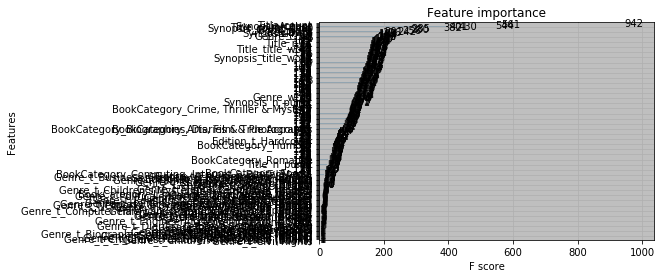

In [483]:
xgb.plot_importance(model)

In [484]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.722571	valid_1's rmse: 0.74411
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.709691	valid_1's rmse: 0.733645
[3]	training's rmse: 0.69755	valid_1's rmse: 0.723481
[4]	training's rmse: 0.685998	valid_1's rmse: 0.714203
[5]	training's rmse: 0.675001	valid_1's rmse: 0.705952
[6]	training's rmse: 0.664487	valid_1's rmse: 0.697485
[7]	training's rmse: 0.65476	valid_1's rmse: 0.689773
[8]	training's rmse: 0.645612	valid_1's rmse: 0.682586
[9]	training's rmse: 0.637204	valid_1's rmse: 0.676099
[10]	training's rmse: 0.628234	valid_1's rmse: 0.669217
[11]	training's rmse: 0.619846	valid_1's rmse: 0.663773
[12]	training's rmse: 0.612525	valid_1's rmse: 0.658849
[13]	training's rmse: 0.604862	valid_1's rmse: 0.653192
[14]	training's rmse: 0.597723	valid_1's rmse: 0.647975
[15]	training's rmse: 0.590906	valid_1's rmse: 0.643033
[16]	training's rmse: 0.584341	valid_1's rmse: 0.639066
[17]	training's rmse: 0.578116	valid_1's rmse: 0.6349

[151]	training's rmse: 0.286007	valid_1's rmse: 0.541181
[152]	training's rmse: 0.285103	valid_1's rmse: 0.54118
[153]	training's rmse: 0.283949	valid_1's rmse: 0.541089
[154]	training's rmse: 0.282999	valid_1's rmse: 0.541164
[155]	training's rmse: 0.282168	valid_1's rmse: 0.541075
[156]	training's rmse: 0.28132	valid_1's rmse: 0.540991
[157]	training's rmse: 0.280394	valid_1's rmse: 0.541062
[158]	training's rmse: 0.279457	valid_1's rmse: 0.541074
[159]	training's rmse: 0.278398	valid_1's rmse: 0.541137
[160]	training's rmse: 0.277297	valid_1's rmse: 0.541049
[161]	training's rmse: 0.27624	valid_1's rmse: 0.540963
[162]	training's rmse: 0.275324	valid_1's rmse: 0.540844
[163]	training's rmse: 0.274407	valid_1's rmse: 0.540693
[164]	training's rmse: 0.273494	valid_1's rmse: 0.54061
[165]	training's rmse: 0.27238	valid_1's rmse: 0.540387
[166]	training's rmse: 0.271548	valid_1's rmse: 0.540311
[167]	training's rmse: 0.2705	valid_1's rmse: 0.54023
[168]	training's rmse: 0.26954	valid_1'

[298]	training's rmse: 0.174915	valid_1's rmse: 0.533993
[299]	training's rmse: 0.174478	valid_1's rmse: 0.534095
[300]	training's rmse: 0.174045	valid_1's rmse: 0.534048
[301]	training's rmse: 0.173576	valid_1's rmse: 0.534033
[302]	training's rmse: 0.173044	valid_1's rmse: 0.533998
[303]	training's rmse: 0.172405	valid_1's rmse: 0.533978
[304]	training's rmse: 0.171846	valid_1's rmse: 0.534028
[305]	training's rmse: 0.171384	valid_1's rmse: 0.533929
[306]	training's rmse: 0.170767	valid_1's rmse: 0.533895
[307]	training's rmse: 0.170245	valid_1's rmse: 0.533843
[308]	training's rmse: 0.169813	valid_1's rmse: 0.533809
[309]	training's rmse: 0.16932	valid_1's rmse: 0.533779
[310]	training's rmse: 0.168732	valid_1's rmse: 0.533715
[311]	training's rmse: 0.168145	valid_1's rmse: 0.533766
[312]	training's rmse: 0.167672	valid_1's rmse: 0.533841
[313]	training's rmse: 0.167158	valid_1's rmse: 0.533733
[314]	training's rmse: 0.166668	valid_1's rmse: 0.533744
[315]	training's rmse: 0.166011	

[442]	training's rmse: 0.113896	valid_1's rmse: 0.531591
[443]	training's rmse: 0.113455	valid_1's rmse: 0.531699
[444]	training's rmse: 0.113193	valid_1's rmse: 0.531629
[445]	training's rmse: 0.112899	valid_1's rmse: 0.531508
[446]	training's rmse: 0.11252	valid_1's rmse: 0.531503
[447]	training's rmse: 0.11227	valid_1's rmse: 0.531461
[448]	training's rmse: 0.111922	valid_1's rmse: 0.531405
[449]	training's rmse: 0.111638	valid_1's rmse: 0.531388
[450]	training's rmse: 0.111337	valid_1's rmse: 0.531386
[451]	training's rmse: 0.110941	valid_1's rmse: 0.531437
[452]	training's rmse: 0.110656	valid_1's rmse: 0.531432
[453]	training's rmse: 0.110416	valid_1's rmse: 0.531443
[454]	training's rmse: 0.11018	valid_1's rmse: 0.531388
[455]	training's rmse: 0.109902	valid_1's rmse: 0.531354
[456]	training's rmse: 0.109633	valid_1's rmse: 0.531345
[457]	training's rmse: 0.109306	valid_1's rmse: 0.531306
[458]	training's rmse: 0.108909	valid_1's rmse: 0.531304
[459]	training's rmse: 0.108683	va

[587]	training's rmse: 0.0767903	valid_1's rmse: 0.530245
[588]	training's rmse: 0.0766083	valid_1's rmse: 0.530225
[589]	training's rmse: 0.0764082	valid_1's rmse: 0.530204
[590]	training's rmse: 0.0762495	valid_1's rmse: 0.530174
[591]	training's rmse: 0.0760252	valid_1's rmse: 0.530119
[592]	training's rmse: 0.0758511	valid_1's rmse: 0.530141
[593]	training's rmse: 0.0756015	valid_1's rmse: 0.530139
[594]	training's rmse: 0.0753976	valid_1's rmse: 0.530107
[595]	training's rmse: 0.0752067	valid_1's rmse: 0.530082
[596]	training's rmse: 0.075037	valid_1's rmse: 0.530104
[597]	training's rmse: 0.0748953	valid_1's rmse: 0.530098
[598]	training's rmse: 0.074704	valid_1's rmse: 0.530111
[599]	training's rmse: 0.0745215	valid_1's rmse: 0.530101
[600]	training's rmse: 0.0743622	valid_1's rmse: 0.530131
[601]	training's rmse: 0.0741524	valid_1's rmse: 0.530074
[602]	training's rmse: 0.0739896	valid_1's rmse: 0.530083
[603]	training's rmse: 0.0737547	valid_1's rmse: 0.530126
[604]	training's

[730]	training's rmse: 0.0543869	valid_1's rmse: 0.529684
[731]	training's rmse: 0.0542769	valid_1's rmse: 0.529688
[732]	training's rmse: 0.0541696	valid_1's rmse: 0.529709
[733]	training's rmse: 0.0540461	valid_1's rmse: 0.529703
[734]	training's rmse: 0.0539272	valid_1's rmse: 0.529697
[735]	training's rmse: 0.0538374	valid_1's rmse: 0.529702
[736]	training's rmse: 0.0536586	valid_1's rmse: 0.529741
[737]	training's rmse: 0.0535524	valid_1's rmse: 0.529726
[738]	training's rmse: 0.0534525	valid_1's rmse: 0.529703
[739]	training's rmse: 0.0533466	valid_1's rmse: 0.529689
[740]	training's rmse: 0.0532314	valid_1's rmse: 0.529694
[741]	training's rmse: 0.0531341	valid_1's rmse: 0.529715
[742]	training's rmse: 0.0529942	valid_1's rmse: 0.529708
[743]	training's rmse: 0.0528825	valid_1's rmse: 0.529723
[744]	training's rmse: 0.0527621	valid_1's rmse: 0.529709
[745]	training's rmse: 0.0526245	valid_1's rmse: 0.52972
[746]	training's rmse: 0.052509	valid_1's rmse: 0.529719
[747]	training's

[872]	training's rmse: 0.0400574	valid_1's rmse: 0.529495
[873]	training's rmse: 0.0399968	valid_1's rmse: 0.529498
[874]	training's rmse: 0.0399038	valid_1's rmse: 0.529504
[875]	training's rmse: 0.0398199	valid_1's rmse: 0.529517
[876]	training's rmse: 0.0397256	valid_1's rmse: 0.529528
[877]	training's rmse: 0.0396525	valid_1's rmse: 0.529522
[878]	training's rmse: 0.0395327	valid_1's rmse: 0.529528
[879]	training's rmse: 0.0394721	valid_1's rmse: 0.529536
[880]	training's rmse: 0.0393601	valid_1's rmse: 0.529555
[881]	training's rmse: 0.0392986	valid_1's rmse: 0.529558
[882]	training's rmse: 0.0392456	valid_1's rmse: 0.52957
[883]	training's rmse: 0.0391775	valid_1's rmse: 0.529546
[884]	training's rmse: 0.0391192	valid_1's rmse: 0.529544
[885]	training's rmse: 0.0390588	valid_1's rmse: 0.529548
[886]	training's rmse: 0.038995	valid_1's rmse: 0.52953
[887]	training's rmse: 0.0389257	valid_1's rmse: 0.529529
[888]	training's rmse: 0.0388669	valid_1's rmse: 0.529531
[889]	training's 

[1016]	training's rmse: 0.0315651	valid_1's rmse: 0.529639
[1017]	training's rmse: 0.0315198	valid_1's rmse: 0.529654
[1018]	training's rmse: 0.0314782	valid_1's rmse: 0.529647
[1019]	training's rmse: 0.0314224	valid_1's rmse: 0.529628
[1020]	training's rmse: 0.0313795	valid_1's rmse: 0.529621
[1021]	training's rmse: 0.031347	valid_1's rmse: 0.529619
[1022]	training's rmse: 0.0313184	valid_1's rmse: 0.529628
[1023]	training's rmse: 0.0312773	valid_1's rmse: 0.529631
[1024]	training's rmse: 0.0312381	valid_1's rmse: 0.529622
[1025]	training's rmse: 0.0311949	valid_1's rmse: 0.529614
[1026]	training's rmse: 0.0311538	valid_1's rmse: 0.52961
[1027]	training's rmse: 0.0311142	valid_1's rmse: 0.529619
[1028]	training's rmse: 0.0310749	valid_1's rmse: 0.529633
[1029]	training's rmse: 0.0310336	valid_1's rmse: 0.52963
[1030]	training's rmse: 0.0309917	valid_1's rmse: 0.529623
[1031]	training's rmse: 0.0309585	valid_1's rmse: 0.529626
[1032]	training's rmse: 0.0309136	valid_1's rmse: 0.529621


[105]	training's rmse: 0.344238	valid_1's rmse: 0.523571
[106]	training's rmse: 0.342642	valid_1's rmse: 0.523501
[107]	training's rmse: 0.341198	valid_1's rmse: 0.523355
[108]	training's rmse: 0.339605	valid_1's rmse: 0.52316
[109]	training's rmse: 0.338133	valid_1's rmse: 0.523169
[110]	training's rmse: 0.336695	valid_1's rmse: 0.522823
[111]	training's rmse: 0.335433	valid_1's rmse: 0.522453
[112]	training's rmse: 0.334155	valid_1's rmse: 0.522283
[113]	training's rmse: 0.332821	valid_1's rmse: 0.521922
[114]	training's rmse: 0.331531	valid_1's rmse: 0.521825
[115]	training's rmse: 0.330248	valid_1's rmse: 0.521636
[116]	training's rmse: 0.328926	valid_1's rmse: 0.521372
[117]	training's rmse: 0.327619	valid_1's rmse: 0.521462
[118]	training's rmse: 0.326383	valid_1's rmse: 0.521446
[119]	training's rmse: 0.324969	valid_1's rmse: 0.521182
[120]	training's rmse: 0.323719	valid_1's rmse: 0.521057
[121]	training's rmse: 0.322604	valid_1's rmse: 0.520805
[122]	training's rmse: 0.321373	

[251]	training's rmse: 0.205084	valid_1's rmse: 0.510312
[252]	training's rmse: 0.204429	valid_1's rmse: 0.510319
[253]	training's rmse: 0.203885	valid_1's rmse: 0.510268
[254]	training's rmse: 0.203223	valid_1's rmse: 0.510267
[255]	training's rmse: 0.202608	valid_1's rmse: 0.510258
[256]	training's rmse: 0.201756	valid_1's rmse: 0.510237
[257]	training's rmse: 0.201225	valid_1's rmse: 0.510195
[258]	training's rmse: 0.200529	valid_1's rmse: 0.510323
[259]	training's rmse: 0.199876	valid_1's rmse: 0.510233
[260]	training's rmse: 0.199185	valid_1's rmse: 0.510228
[261]	training's rmse: 0.198407	valid_1's rmse: 0.510117
[262]	training's rmse: 0.197796	valid_1's rmse: 0.510032
[263]	training's rmse: 0.197275	valid_1's rmse: 0.510047
[264]	training's rmse: 0.196655	valid_1's rmse: 0.510036
[265]	training's rmse: 0.19582	valid_1's rmse: 0.510016
[266]	training's rmse: 0.195283	valid_1's rmse: 0.509989
[267]	training's rmse: 0.194717	valid_1's rmse: 0.509917
[268]	training's rmse: 0.19414	v

[396]	training's rmse: 0.134259	valid_1's rmse: 0.506971
[397]	training's rmse: 0.133917	valid_1's rmse: 0.506925
[398]	training's rmse: 0.133608	valid_1's rmse: 0.506894
[399]	training's rmse: 0.133145	valid_1's rmse: 0.506857
[400]	training's rmse: 0.132768	valid_1's rmse: 0.50684
[401]	training's rmse: 0.13244	valid_1's rmse: 0.506806
[402]	training's rmse: 0.132161	valid_1's rmse: 0.506829
[403]	training's rmse: 0.131769	valid_1's rmse: 0.506836
[404]	training's rmse: 0.131452	valid_1's rmse: 0.506829
[405]	training's rmse: 0.131124	valid_1's rmse: 0.506862
[406]	training's rmse: 0.130876	valid_1's rmse: 0.506843
[407]	training's rmse: 0.13054	valid_1's rmse: 0.5068
[408]	training's rmse: 0.130181	valid_1's rmse: 0.506804
[409]	training's rmse: 0.12981	valid_1's rmse: 0.506821
[410]	training's rmse: 0.129404	valid_1's rmse: 0.506805
[411]	training's rmse: 0.128948	valid_1's rmse: 0.506731
[412]	training's rmse: 0.12859	valid_1's rmse: 0.506699
[413]	training's rmse: 0.128235	valid_

[543]	training's rmse: 0.0902448	valid_1's rmse: 0.505128
[544]	training's rmse: 0.0899884	valid_1's rmse: 0.50507
[545]	training's rmse: 0.0897664	valid_1's rmse: 0.505129
[546]	training's rmse: 0.0894959	valid_1's rmse: 0.505163
[547]	training's rmse: 0.0892628	valid_1's rmse: 0.505188
[548]	training's rmse: 0.0889798	valid_1's rmse: 0.505148
[549]	training's rmse: 0.0887475	valid_1's rmse: 0.505131
[550]	training's rmse: 0.088521	valid_1's rmse: 0.505134
[551]	training's rmse: 0.0883507	valid_1's rmse: 0.505139
[552]	training's rmse: 0.0881346	valid_1's rmse: 0.50513
[553]	training's rmse: 0.0879634	valid_1's rmse: 0.505137
[554]	training's rmse: 0.0876897	valid_1's rmse: 0.505101
[555]	training's rmse: 0.0875087	valid_1's rmse: 0.505041
[556]	training's rmse: 0.087297	valid_1's rmse: 0.505023
[557]	training's rmse: 0.08713	valid_1's rmse: 0.505018
[558]	training's rmse: 0.0869253	valid_1's rmse: 0.505034
[559]	training's rmse: 0.0866732	valid_1's rmse: 0.505043
[560]	training's rms

[689]	training's rmse: 0.0636382	valid_1's rmse: 0.504609
[690]	training's rmse: 0.0635069	valid_1's rmse: 0.504623
[691]	training's rmse: 0.0633208	valid_1's rmse: 0.504625
[692]	training's rmse: 0.0631614	valid_1's rmse: 0.504619
[693]	training's rmse: 0.0630138	valid_1's rmse: 0.504633
[694]	training's rmse: 0.0628577	valid_1's rmse: 0.50463
[695]	training's rmse: 0.0627375	valid_1's rmse: 0.504615
[696]	training's rmse: 0.0626077	valid_1's rmse: 0.504612
[697]	training's rmse: 0.0624385	valid_1's rmse: 0.504585
[698]	training's rmse: 0.0623304	valid_1's rmse: 0.504597
[699]	training's rmse: 0.0621473	valid_1's rmse: 0.504607
[700]	training's rmse: 0.0619795	valid_1's rmse: 0.504608
[701]	training's rmse: 0.0618367	valid_1's rmse: 0.504597
[702]	training's rmse: 0.0616938	valid_1's rmse: 0.504627
[703]	training's rmse: 0.0615649	valid_1's rmse: 0.504635
[704]	training's rmse: 0.0614327	valid_1's rmse: 0.50464
[705]	training's rmse: 0.0613177	valid_1's rmse: 0.504633
[706]	training's

[833]	training's rmse: 0.0470222	valid_1's rmse: 0.504304
[834]	training's rmse: 0.0468858	valid_1's rmse: 0.504305
[835]	training's rmse: 0.046806	valid_1's rmse: 0.504321
[836]	training's rmse: 0.0467313	valid_1's rmse: 0.50432
[837]	training's rmse: 0.0466358	valid_1's rmse: 0.504312
[838]	training's rmse: 0.0465567	valid_1's rmse: 0.504324
[839]	training's rmse: 0.0464885	valid_1's rmse: 0.504323
[840]	training's rmse: 0.0464251	valid_1's rmse: 0.504337
[841]	training's rmse: 0.0463537	valid_1's rmse: 0.504332
[842]	training's rmse: 0.0462911	valid_1's rmse: 0.504334
[843]	training's rmse: 0.0462046	valid_1's rmse: 0.504351
[844]	training's rmse: 0.0461202	valid_1's rmse: 0.504341
[845]	training's rmse: 0.0460513	valid_1's rmse: 0.504336
[846]	training's rmse: 0.0459264	valid_1's rmse: 0.504347
[847]	training's rmse: 0.0458319	valid_1's rmse: 0.504345
[848]	training's rmse: 0.0457373	valid_1's rmse: 0.504336
[849]	training's rmse: 0.0456742	valid_1's rmse: 0.504321
[850]	training's

[975]	training's rmse: 0.0371563	valid_1's rmse: 0.504302
[976]	training's rmse: 0.0371085	valid_1's rmse: 0.504302
[977]	training's rmse: 0.0370288	valid_1's rmse: 0.504324
[978]	training's rmse: 0.0369829	valid_1's rmse: 0.504338
[979]	training's rmse: 0.0369296	valid_1's rmse: 0.504349
[980]	training's rmse: 0.0368524	valid_1's rmse: 0.504352
[981]	training's rmse: 0.036798	valid_1's rmse: 0.504353
[982]	training's rmse: 0.0367143	valid_1's rmse: 0.504356
[983]	training's rmse: 0.0366464	valid_1's rmse: 0.504344
[984]	training's rmse: 0.0365767	valid_1's rmse: 0.504353
[985]	training's rmse: 0.036533	valid_1's rmse: 0.504359
[986]	training's rmse: 0.036495	valid_1's rmse: 0.504368
[987]	training's rmse: 0.0364335	valid_1's rmse: 0.504372
[988]	training's rmse: 0.0363628	valid_1's rmse: 0.50437
[989]	training's rmse: 0.0363172	valid_1's rmse: 0.504358
[990]	training's rmse: 0.0362849	valid_1's rmse: 0.504359
[991]	training's rmse: 0.0362385	valid_1's rmse: 0.504355
[992]	training's r

[19]	training's rmse: 0.570951	valid_1's rmse: 0.610607
[20]	training's rmse: 0.565257	valid_1's rmse: 0.607152
[21]	training's rmse: 0.559409	valid_1's rmse: 0.603543
[22]	training's rmse: 0.554081	valid_1's rmse: 0.600264
[23]	training's rmse: 0.549089	valid_1's rmse: 0.598167
[24]	training's rmse: 0.543795	valid_1's rmse: 0.595184
[25]	training's rmse: 0.539102	valid_1's rmse: 0.593598
[26]	training's rmse: 0.534135	valid_1's rmse: 0.590898
[27]	training's rmse: 0.52968	valid_1's rmse: 0.588535
[28]	training's rmse: 0.525142	valid_1's rmse: 0.58568
[29]	training's rmse: 0.521033	valid_1's rmse: 0.583297
[30]	training's rmse: 0.517035	valid_1's rmse: 0.580874
[31]	training's rmse: 0.512809	valid_1's rmse: 0.578425
[32]	training's rmse: 0.509162	valid_1's rmse: 0.577433
[33]	training's rmse: 0.505069	valid_1's rmse: 0.575493
[34]	training's rmse: 0.501172	valid_1's rmse: 0.574057
[35]	training's rmse: 0.497328	valid_1's rmse: 0.572317
[36]	training's rmse: 0.493741	valid_1's rmse: 0.5

[166]	training's rmse: 0.271308	valid_1's rmse: 0.519071
[167]	training's rmse: 0.270469	valid_1's rmse: 0.518806
[168]	training's rmse: 0.269595	valid_1's rmse: 0.518714
[169]	training's rmse: 0.2685	valid_1's rmse: 0.518836
[170]	training's rmse: 0.267503	valid_1's rmse: 0.51876
[171]	training's rmse: 0.266616	valid_1's rmse: 0.518584
[172]	training's rmse: 0.265811	valid_1's rmse: 0.51854
[173]	training's rmse: 0.264969	valid_1's rmse: 0.518539
[174]	training's rmse: 0.264167	valid_1's rmse: 0.518571
[175]	training's rmse: 0.263319	valid_1's rmse: 0.518453
[176]	training's rmse: 0.262466	valid_1's rmse: 0.518342
[177]	training's rmse: 0.261474	valid_1's rmse: 0.518282
[178]	training's rmse: 0.260373	valid_1's rmse: 0.518149
[179]	training's rmse: 0.25951	valid_1's rmse: 0.517979
[180]	training's rmse: 0.258663	valid_1's rmse: 0.517873
[181]	training's rmse: 0.257819	valid_1's rmse: 0.51772
[182]	training's rmse: 0.257119	valid_1's rmse: 0.517528
[183]	training's rmse: 0.256279	valid

[314]	training's rmse: 0.167414	valid_1's rmse: 0.511525
[315]	training's rmse: 0.166751	valid_1's rmse: 0.511532
[316]	training's rmse: 0.166309	valid_1's rmse: 0.511552
[317]	training's rmse: 0.165789	valid_1's rmse: 0.511526
[318]	training's rmse: 0.165282	valid_1's rmse: 0.511542
[319]	training's rmse: 0.1648	valid_1's rmse: 0.511515
[320]	training's rmse: 0.16427	valid_1's rmse: 0.511498
[321]	training's rmse: 0.163674	valid_1's rmse: 0.511458
[322]	training's rmse: 0.163207	valid_1's rmse: 0.511435
[323]	training's rmse: 0.162785	valid_1's rmse: 0.511461
[324]	training's rmse: 0.162372	valid_1's rmse: 0.511469
[325]	training's rmse: 0.161839	valid_1's rmse: 0.511504
[326]	training's rmse: 0.161378	valid_1's rmse: 0.511435
[327]	training's rmse: 0.161045	valid_1's rmse: 0.511514
[328]	training's rmse: 0.160501	valid_1's rmse: 0.511529
[329]	training's rmse: 0.159995	valid_1's rmse: 0.511452
[330]	training's rmse: 0.159447	valid_1's rmse: 0.51145
[331]	training's rmse: 0.158923	val

[461]	training's rmse: 0.110335	valid_1's rmse: 0.509513
[462]	training's rmse: 0.110013	valid_1's rmse: 0.509561
[463]	training's rmse: 0.109787	valid_1's rmse: 0.509512
[464]	training's rmse: 0.109489	valid_1's rmse: 0.509539
[465]	training's rmse: 0.109194	valid_1's rmse: 0.509555
[466]	training's rmse: 0.108955	valid_1's rmse: 0.509521
[467]	training's rmse: 0.108731	valid_1's rmse: 0.509513
[468]	training's rmse: 0.108496	valid_1's rmse: 0.5095
[469]	training's rmse: 0.108244	valid_1's rmse: 0.509489
[470]	training's rmse: 0.107924	valid_1's rmse: 0.50945
[471]	training's rmse: 0.107711	valid_1's rmse: 0.509413
[472]	training's rmse: 0.107506	valid_1's rmse: 0.509406
[473]	training's rmse: 0.107263	valid_1's rmse: 0.509434
[474]	training's rmse: 0.106917	valid_1's rmse: 0.509453
[475]	training's rmse: 0.106596	valid_1's rmse: 0.509427
[476]	training's rmse: 0.106296	valid_1's rmse: 0.509412
[477]	training's rmse: 0.106049	valid_1's rmse: 0.509395
[478]	training's rmse: 0.105765	va

[606]	training's rmse: 0.0765189	valid_1's rmse: 0.508413
[607]	training's rmse: 0.0763723	valid_1's rmse: 0.508419
[608]	training's rmse: 0.0761578	valid_1's rmse: 0.508432
[609]	training's rmse: 0.0760016	valid_1's rmse: 0.508411
[610]	training's rmse: 0.0758569	valid_1's rmse: 0.508415
[611]	training's rmse: 0.0756106	valid_1's rmse: 0.508422
[612]	training's rmse: 0.0754524	valid_1's rmse: 0.50846
[613]	training's rmse: 0.0753159	valid_1's rmse: 0.508458
[614]	training's rmse: 0.0751978	valid_1's rmse: 0.508462
[615]	training's rmse: 0.0749662	valid_1's rmse: 0.508471
[616]	training's rmse: 0.0747551	valid_1's rmse: 0.508469
[617]	training's rmse: 0.0746343	valid_1's rmse: 0.508447
[618]	training's rmse: 0.0744339	valid_1's rmse: 0.50843
[619]	training's rmse: 0.0742332	valid_1's rmse: 0.508435
[620]	training's rmse: 0.0740543	valid_1's rmse: 0.508413
[621]	training's rmse: 0.073913	valid_1's rmse: 0.508397
[622]	training's rmse: 0.0737297	valid_1's rmse: 0.508379
[623]	training's 

[749]	training's rmse: 0.0560297	valid_1's rmse: 0.507887
[750]	training's rmse: 0.0559144	valid_1's rmse: 0.507875
[751]	training's rmse: 0.0557969	valid_1's rmse: 0.507869
[752]	training's rmse: 0.0556916	valid_1's rmse: 0.507862
[753]	training's rmse: 0.0556047	valid_1's rmse: 0.507858
[754]	training's rmse: 0.0554932	valid_1's rmse: 0.507856
[755]	training's rmse: 0.0553644	valid_1's rmse: 0.507824
[756]	training's rmse: 0.0552327	valid_1's rmse: 0.50781
[757]	training's rmse: 0.0551434	valid_1's rmse: 0.507815
[758]	training's rmse: 0.0550097	valid_1's rmse: 0.507811
[759]	training's rmse: 0.0548592	valid_1's rmse: 0.507807
[760]	training's rmse: 0.0547357	valid_1's rmse: 0.507808
[761]	training's rmse: 0.0546129	valid_1's rmse: 0.507809
[762]	training's rmse: 0.0545221	valid_1's rmse: 0.507807
[763]	training's rmse: 0.0544392	valid_1's rmse: 0.507792
[764]	training's rmse: 0.0543156	valid_1's rmse: 0.507787
[765]	training's rmse: 0.0542135	valid_1's rmse: 0.507784
[766]	training'

[894]	training's rmse: 0.0432146	valid_1's rmse: 0.507694
[895]	training's rmse: 0.0431151	valid_1's rmse: 0.507687
[896]	training's rmse: 0.0430183	valid_1's rmse: 0.50767
[897]	training's rmse: 0.0429436	valid_1's rmse: 0.507662
[898]	training's rmse: 0.0428624	valid_1's rmse: 0.507652
[899]	training's rmse: 0.0428142	valid_1's rmse: 0.507651
[900]	training's rmse: 0.0427741	valid_1's rmse: 0.507648
[901]	training's rmse: 0.0426885	valid_1's rmse: 0.507637
[902]	training's rmse: 0.042637	valid_1's rmse: 0.507642
[903]	training's rmse: 0.0425903	valid_1's rmse: 0.507642
[904]	training's rmse: 0.042529	valid_1's rmse: 0.507647
[905]	training's rmse: 0.042445	valid_1's rmse: 0.507661
[906]	training's rmse: 0.0424031	valid_1's rmse: 0.507666
[907]	training's rmse: 0.0423327	valid_1's rmse: 0.507666
[908]	training's rmse: 0.0422765	valid_1's rmse: 0.507671
[909]	training's rmse: 0.0422061	valid_1's rmse: 0.507663
[910]	training's rmse: 0.0421378	valid_1's rmse: 0.50765
[911]	training's rm

[1039]	training's rmse: 0.0347945	valid_1's rmse: 0.507624
[1040]	training's rmse: 0.0347496	valid_1's rmse: 0.507628
[1041]	training's rmse: 0.0347029	valid_1's rmse: 0.507627
[1042]	training's rmse: 0.0346626	valid_1's rmse: 0.507642
[1043]	training's rmse: 0.0346273	valid_1's rmse: 0.507649
[1044]	training's rmse: 0.0345622	valid_1's rmse: 0.507652
[1045]	training's rmse: 0.034505	valid_1's rmse: 0.507652
[1046]	training's rmse: 0.0344454	valid_1's rmse: 0.507661
[1047]	training's rmse: 0.0343999	valid_1's rmse: 0.507664
[1048]	training's rmse: 0.0343722	valid_1's rmse: 0.507653
[1049]	training's rmse: 0.0343241	valid_1's rmse: 0.507671
[1050]	training's rmse: 0.0342787	valid_1's rmse: 0.507668
[1051]	training's rmse: 0.0342394	valid_1's rmse: 0.507665
[1052]	training's rmse: 0.0342095	valid_1's rmse: 0.507672
[1053]	training's rmse: 0.0341766	valid_1's rmse: 0.507672
[1054]	training's rmse: 0.0341237	valid_1's rmse: 0.507667
[1055]	training's rmse: 0.0340884	valid_1's rmse: 0.50766

[1183]	training's rmse: 0.029147	valid_1's rmse: 0.507705
[1184]	training's rmse: 0.0291129	valid_1's rmse: 0.507706
[1185]	training's rmse: 0.029085	valid_1's rmse: 0.507707
[1186]	training's rmse: 0.0290585	valid_1's rmse: 0.507707
[1187]	training's rmse: 0.0290353	valid_1's rmse: 0.507698
[1188]	training's rmse: 0.0290075	valid_1's rmse: 0.507695
[1189]	training's rmse: 0.0289745	valid_1's rmse: 0.507692
[1190]	training's rmse: 0.0289478	valid_1's rmse: 0.507689
[1191]	training's rmse: 0.02892	valid_1's rmse: 0.507693
[1192]	training's rmse: 0.0288919	valid_1's rmse: 0.507697
[1193]	training's rmse: 0.0288597	valid_1's rmse: 0.507696
[1194]	training's rmse: 0.0288251	valid_1's rmse: 0.507702
[1195]	training's rmse: 0.0287965	valid_1's rmse: 0.507698
[1196]	training's rmse: 0.0287575	valid_1's rmse: 0.507695
[1197]	training's rmse: 0.0287366	valid_1's rmse: 0.507689
[1198]	training's rmse: 0.0287101	valid_1's rmse: 0.507679
[1199]	training's rmse: 0.0286775	valid_1's rmse: 0.50768
[1

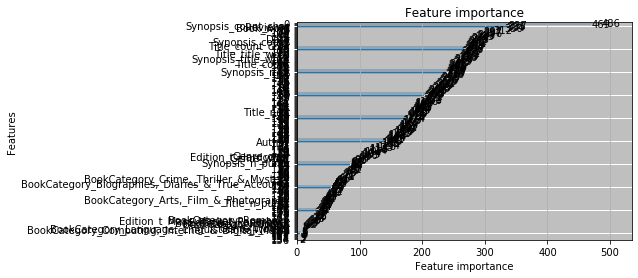

In [485]:
lgb.plot_importance(model)

In [486]:
test_lgb_1 = np.exp(test_lgb)-1
test_xgb_1 = np.exp(test_xgb)-1

In [495]:
answer1 = np.mean(test_lgb_1, axis = 1)

In [487]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [85]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=99)
rf.fit(pd.concat([np.mean(train_xgb,axis=1),np.mean(train_xgb,axis=1)],axis=1), train_label)


ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 275 

In [87]:
answer = rf.predict(pd.concat([np.mean(test_xgb_1,axis=1), np.mean(test_lgb_1,axis=1)], axis =1))

In [88]:
answer

array([8.47923749, 8.47923749, 8.47923749, ..., 8.47923749, 8.47923749,
       8.47923749])

In [89]:
sample.Price = np.exp(answer)-1

In [496]:
sample.Price = answer1.values

In [497]:
sample.to_excel('answer4.xlsx', index=False)

In [498]:
sample

,Price
0,391.846155
1,1239.506271
2,352.996811
3,1044.245886
4,342.751454
...,...
1555,1311.248302
1556,183.217383
1557,504.147379
1558,280.823294


In [183]:
pd.Series(rf.feature_importances_, index = train.columns)

NameError: name 'rf' is not defined

In [313]:
x

,0,1,2
0,5.777148,0.0,0.000000
1,0.000000,0.0,5.910837
2,5.912602,0.0,0.000000
3,5.640060,0.0,0.000000
4,5.920628,0.0,0.000000
...,...,...,...
6224,6.722651,0.0,0.000000
6225,0.000000,0.0,5.849282
6226,6.410926,0.0,0.000000
6227,5.705458,0.0,0.000000


In [630]:
(ntrain_xgb[0]

0       0.000000
1       0.000000
2       0.000000
3       5.405558
4       6.950172
          ...   
6224    6.043969
6225    0.000000
6226    5.796917
6227    0.000000
6228    0.000000
Name: 0, Length: 6229, dtype: float64

In [295]:
train_lgb

,0,1,2
0,0.000000,0.000000,5.386080
1,0.000000,0.000000,5.712294
2,0.000000,0.000000,5.803772
3,0.000000,5.364648,0.000000
4,7.100501,0.000000,0.000000
...,...,...,...
6198,0.000000,6.297189,0.000000
6199,0.000000,0.000000,5.829923
6200,0.000000,5.687904,0.000000
6201,0.000000,0.000000,5.743549
